In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [7]:
#file_name=pd.read_csv('data/01_District_wise_crimes_committed_IPC_2014.csv',names=['states','district','year','murder','Rape','Custodial Rape', 'Custodial_Gang Rape','Offences promoting enmity between different groups','Promoting enmity between different groups' ,'Imputation', 'assertions prejudicial to national integration' ,'Extortion','Disclosure of Identity of Victims' ,'Incidence of Rash Driving' ,'HumanTrafficking','Unnatural Offence','Other IPC crimes','Total Cognizable IPC crimes'])
data01to14=pd.read_csv('data/01_District_wise_crimes_committed_IPC_2001_2012.csv')
print(len(data01to14))
data01to14.head()

10678


,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,ARSON,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,177,78,16,104,30,16,149,34,175,181
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,309,168,11,65,69,7,118,24,154,270
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,559,156,33,209,38,14,112,83,186,404
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,137,164,12,37,23,17,126,38,57,233
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,871,70,50,220,41,12,109,58,247,431


In [3]:
district=[]
for i in data01to14['DISTRICT']:
    if 'and' in i:
        district.append(i)
    elif ' ' in i:
        temp=i.find(' ')
        if i.count(' ')==1 and temp<len(i)-1:
            district.append(i[0]+i[1:temp+1].lower()+i[temp+1]+i[temp+2:].lower())
        else:
            district.append(i)
    else:
        district.append(i[0]+i[1:].lower())

In [4]:
data01to14['DISTRICT']=district
data01to14['STATE/UT']=="Jammu and kashmir"

0        False
1        False
2        False
3        False
4        False
         ...  
10673    False
10674    False
10675    False
10676    False
10677    False
Name: STATE/UT, Length: 10678, dtype: bool

In [15]:
data01to14['STATE/UT'].head()

0    ANDHRA PRADESH
1    ANDHRA PRADESH
2    ANDHRA PRADESH
3    ANDHRA PRADESH
4    ANDHRA PRADESH
Name: STATE/UT, dtype: object

In [8]:
murder=pd.DataFrame({'DISTRICT':district,'MURDER':data01to14['MURDER']})
finalmurder=dict()
for i in district:
    finalmurder[i]=sum(murder[murder['DISTRICT']==i]['MURDER'])

In [ ]:
theft=pd.DataFrame({'district':district,'theft':data01to14['THEFT'],'robbery':data01to14['ROBBERY'],'burglary':data01to14['BURGLARY']})
finaltheft=dict()
for i in district:
    useme=theft[theft['district']==i]
    finaltheft[i]=sum(useme['theft'])+sum(useme['robbery'])+sum(useme['burglary'])
print(finaltheft['Pune Rural'])

In [ ]:
women=pd.DataFrame({'district':district,'kidnap':data01to14['KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS'],'rape':data01to14['RAPE'],'assault':data01to14['ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY'],'insult':data01to14['INSULT TO MODESTY OF WOMEN'],'husband':data01to14['CRUELTY BY HUSBAND OR HIS RELATIVES'],'dowry':data01to14['DOWRY DEATHS']})
finalwomen=dict()
for i in district:
    useme=women[women['district']==i]
    finalwomen[i]=sum(useme['rape'])+sum(useme['kidnap'])+sum(useme['assault'])+sum(useme['insult'])+sum(useme['husband'])+sum(useme['dowry'])
print(finalwomen['Pune Rural'])

In [9]:
print(finalwomen['Nizamabad'])

10142


In [10]:
print(finaltheft['Mumbai'])

70699


In [7]:
murder=pd.DataFrame({'DISTRICT':finalmurder.keys(),'MURDER':finalmurder.values()})
murder[:10]

,DISTRICT,MURDER
0,Adilabad,1383
1,Anantapur,2212
2,Chittoor,1426
3,Cuddapah,1369
4,East Godavari,1173
5,Guntakal Rly.,77
6,Guntur,1990
7,Hyderabad City,1693
8,Karimnagar,1884
9,Khammam,1516


In [8]:
theft=pd.DataFrame({'district':finaltheft.keys(),'theft':finaltheft.values()})
theft[:10]

,district,theft
0,Adilabad,8189
1,Anantapur,10956
2,Chittoor,15486
3,Cuddapah,7914
4,East Godavari,21249
5,Guntakal Rly.,2373
6,Guntur,18854
7,Hyderabad City,80493
8,Karimnagar,13478
9,Khammam,11469


In [9]:
women=pd.DataFrame({'district':finaltheft.keys(),'women':finalwomen.values()})
women[:10]

,district,women
0,Adilabad,10292
1,Anantapur,6738
2,Chittoor,9297
3,Cuddapah,6141
4,East Godavari,11830
5,Guntakal Rly.,62
6,Guntur,14648
7,Hyderabad City,23593
8,Karimnagar,18931
9,Khammam,13205


NameError: name 'murder' is not defined

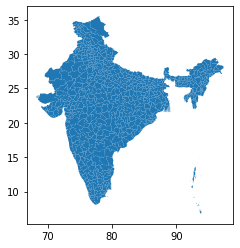

In [49]:
fp = "gadm36_IND_shp/gadm36_IND_2.shp" 
map_df=gpd.read_file(fp)
map_df = map_df[['NAME_2', 'geometry']]
map_df.plot()
mergedmurder = map_df.set_index('NAME_2').join(murder.set_index('DISTRICT'))
mergedtheft=map_df.set_index('NAME_2').join(theft.set_index('district'))
mergedwomen=map_df.set_index('NAME_2').join(women.set_index('district'))

In [7]:
map_df['NAME_2']

0               Nicobar Islands
1      North and Middle Andaman
2                 South Andaman
3                     Anantapur
4                      Chittoor
                 ...           
661          Pashchim Medinipur
662             Purba Medinipur
663                    Puruliya
664           South 24 Parganas
665              Uttar Dinajpur
Name: NAME_2, Length: 666, dtype: object

In [112]:
mergedmurder.head()

,geometry,MURDER
Adilabad,"POLYGON ((79.92231 19.15713, 79.90597 19.14179...",101.0
Adilabad,"POLYGON ((79.92231 19.15713, 79.90597 19.14179...",100.0
Adilabad,"POLYGON ((79.92231 19.15713, 79.90597 19.14179...",107.0
Adilabad,"POLYGON ((79.92231 19.15713, 79.90597 19.14179...",113.0
Adilabad,"POLYGON ((79.92231 19.15713, 79.90597 19.14179...",108.0
...,...,...
Zunheboto,"POLYGON ((94.27402 26.01501, 94.27753 26.01633...",4.0
Zunheboto,"POLYGON ((94.27402 26.01501, 94.27753 26.01633...",4.0
Zunheboto,"POLYGON ((94.27402 26.01501, 94.27753 26.01633...",10.0
Zunheboto,"POLYGON ((94.27402 26.01501, 94.27753 26.01633...",5.0


In [89]:
mergedtheft.head()

,geometry,theft
Adilabad,"POLYGON ((79.92231 19.15713, 79.90597 19.14179...",8189.0
Agar Malwa,"POLYGON ((76.19970 23.70700, 76.19933 23.70590...",NaN
Agra,"POLYGON ((78.20979 26.83609, 78.21165 26.83846...",32625.0
Ahmadabad,"POLYGON ((71.89120 22.09747, 71.88139 22.09477...",NaN
Ahmadnagar,"POLYGON ((74.83829 18.33893, 74.83713 18.34180...",NaN


In [90]:
mergedwomen.head()

,geometry,women
Adilabad,"POLYGON ((79.92231 19.15713, 79.90597 19.14179...",10292.0
Agar Malwa,"POLYGON ((76.19970 23.70700, 76.19933 23.70590...",NaN
Agra,"POLYGON ((78.20979 26.83609, 78.21165 26.83846...",11529.0
Ahmadabad,"POLYGON ((71.89120 22.09747, 71.88139 22.09477...",NaN
Ahmadnagar,"POLYGON ((74.83829 18.33893, 74.83713 18.34180...",NaN


In [91]:
mergedmurder.isna().sum()

geometry      0
MURDER      164
dtype: int64

In [92]:
mergedtheft.isna().sum()

geometry      0
theft       164
dtype: int64

In [93]:
mergedwomen.isna().sum()

geometry      0
women       164
dtype: int64

In [11]:
mergedmurder['MURDER'].fillna(mergedmurder['MURDER'].mean(), inplace=True)
mergedtheft['theft'].fillna(mergedtheft['theft'].mean(), inplace=True)
mergedwomen['women'].fillna(mergedwomen['women'].mean(), inplace=True)

In [95]:
mergedmurder.isna().sum()

geometry    0
MURDER      0
dtype: int64

In [96]:
mergedtheft.isna().sum()

geometry    0
theft       0
dtype: int64

In [97]:
mergedwomen.isna().sum()

geometry    0
women       0
dtype: int64

<AxesSubplot:>

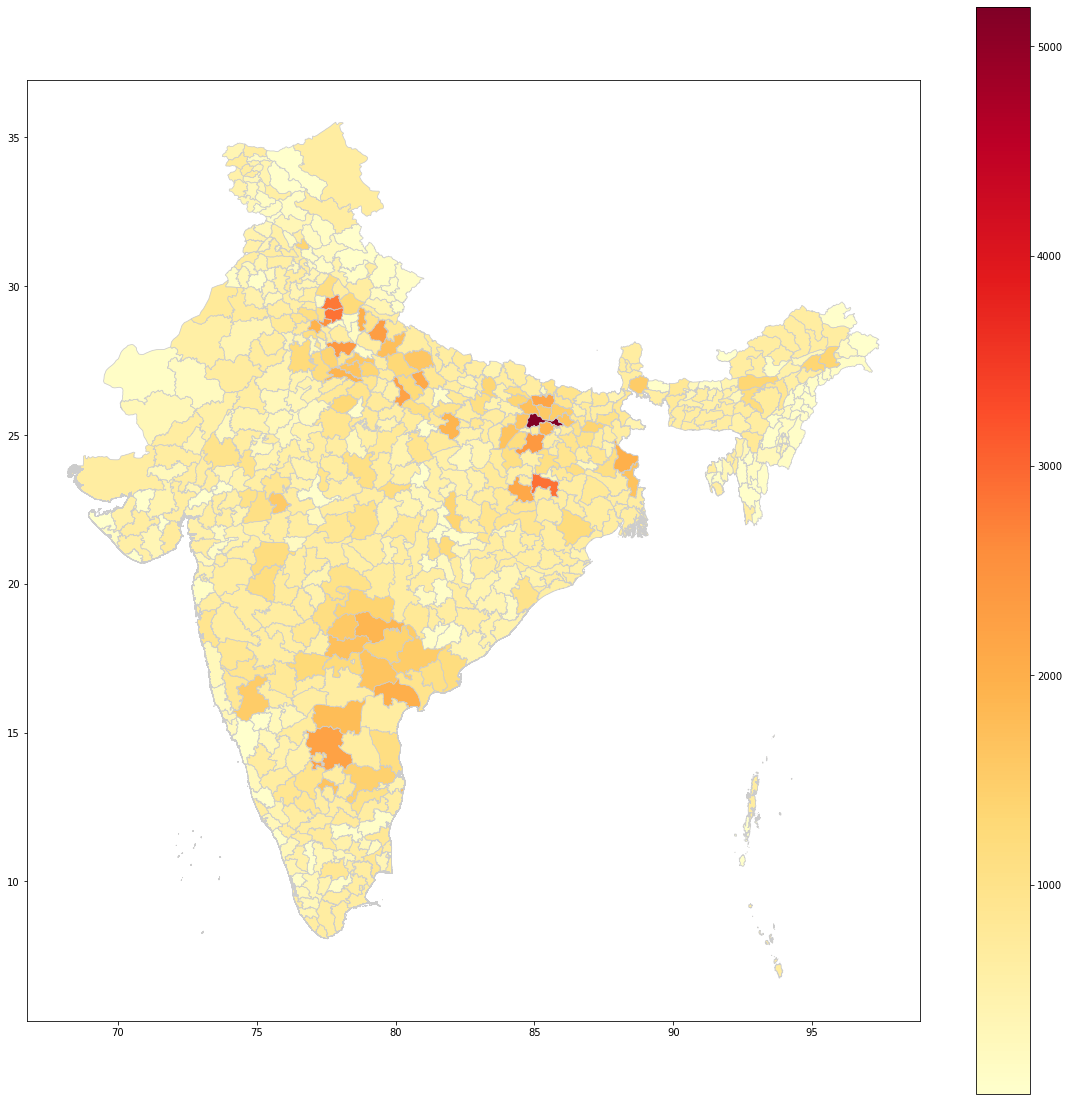

In [12]:
fig, ax = plt.subplots(1, figsize=(20,20))
mergedmurder.plot(column='MURDER', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

<AxesSubplot:>

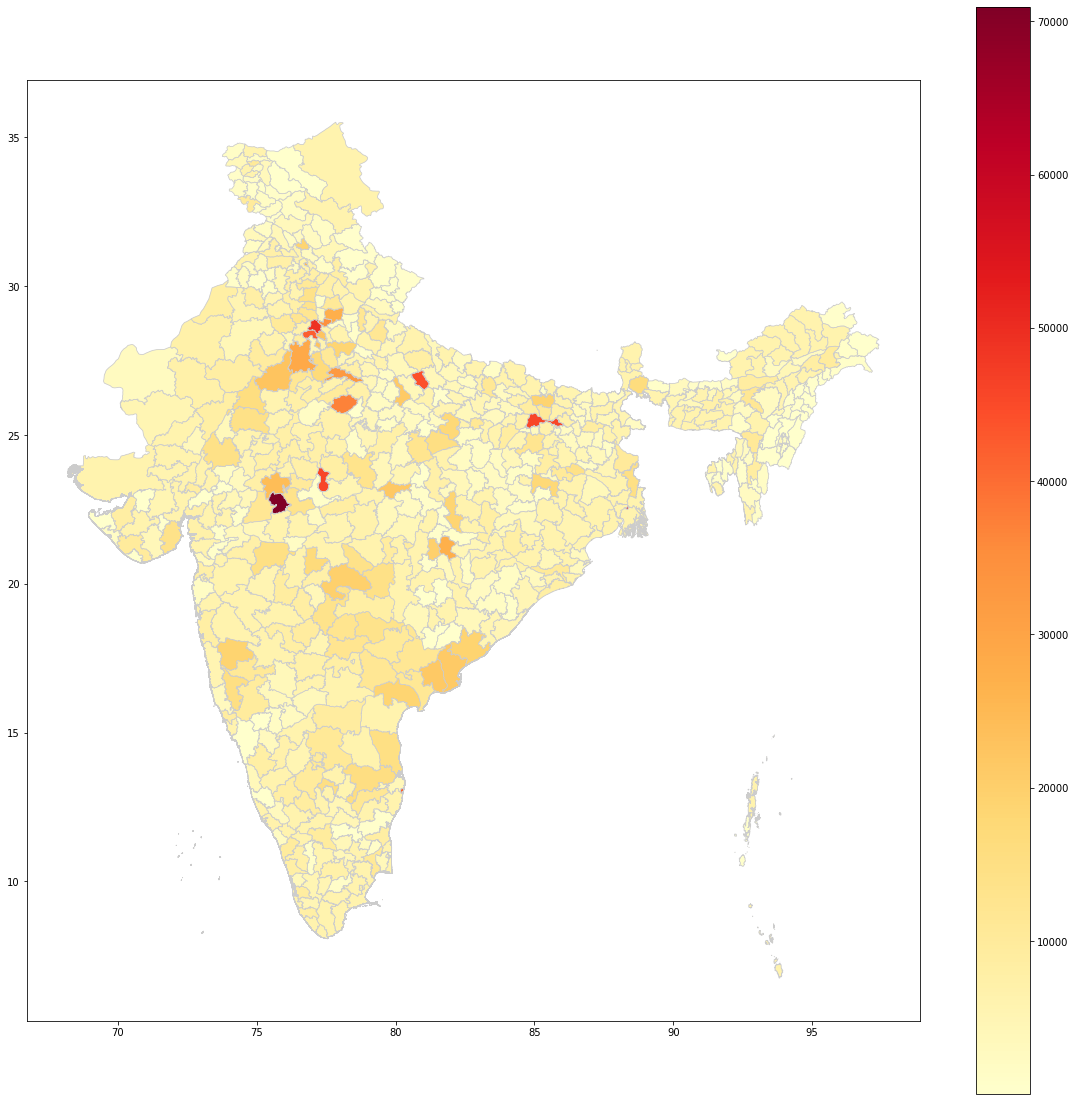

In [13]:
fig, ax = plt.subplots(1, figsize=(20,20))
mergedtheft.plot(column='theft', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

<AxesSubplot:>

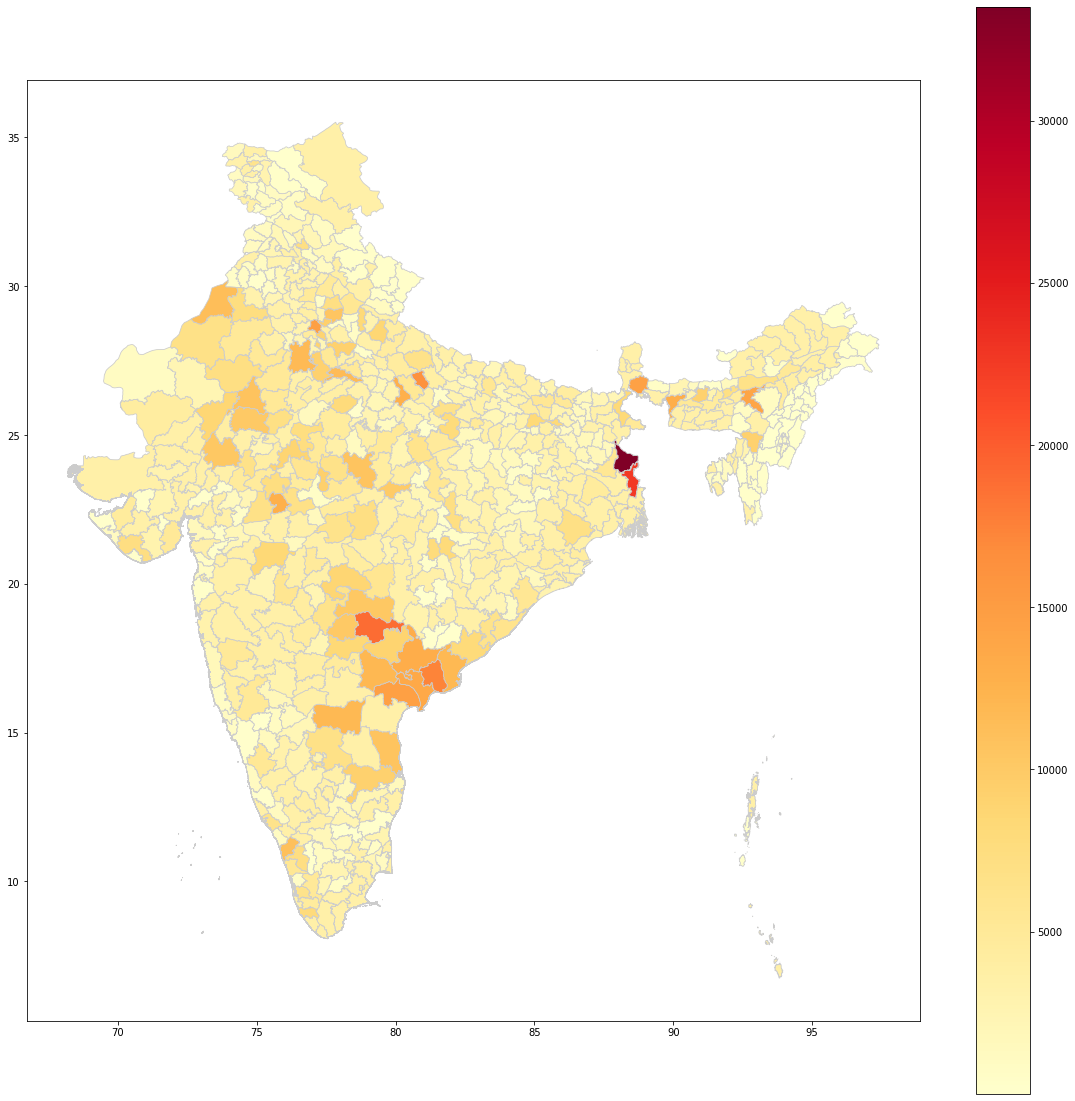

In [18]:
fig, ax = plt.subplots(1, figsize=(20,20))
mergedwomen.plot(column='women', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

In [50]:
fp = "gadm36_IND_shp/gadm36_IND_2.shp"
map_df = gpd.read_file(fp)
district='Assam'
crime='MURDER'

In [51]:
map_df['NAME_1'].unique()

array(['Andaman and Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli', 'Daman and Diu', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'NCT of Delhi', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

0      Andaman and Nicobar
1      Andaman and Nicobar
2      Andaman and Nicobar
3           Andhra Pradesh
4           Andhra Pradesh
              ...         
661            West Bengal
662            West Bengal
663            West Bengal
664            West Bengal
665            West Bengal
Name: NAME_1, Length: 666, dtype: object


<AxesSubplot:>

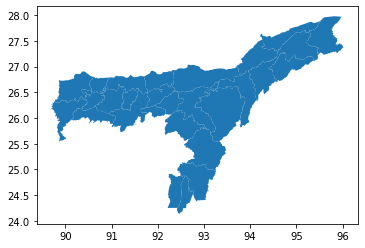

In [11]:
map_df = map_df[['NAME_1', 'NAME_2', 'geometry']]
map_df = map_df[map_df['NAME_1']==district]
map_df.plot()

In [37]:
district_wise = data01to14[['STATE/UT', 'DISTRICT', crime]]
district_wise = district_wise[district_wise['STATE/UT']==district]
district_wise.head()

,STATE/UT,DISTRICT,MURDER
9070,Assam,BAKSA,42
9071,Assam,BARPETA,46
9072,Assam,BIEO,0
9073,Assam,BONGAIGAON,20
9074,Assam,C.I.D.,1


In [39]:
merged = map_df.set_index('NAME_2').join(district_wise.set_index('DISTRICT'))
merged[crime].fillna(merged[crime].mean(), inplace=True)
merged.head()

,NAME_1,geometry,STATE/UT,MURDER
NAME_2,,,,
Baksa,Assam,"POLYGON ((91.78369 26.49809, 91.78181 26.49697...",NaN,50.913043
Barpeta,Assam,"POLYGON ((91.29124 26.57613, 91.29190 26.57254...",Assam,46.000000
Bongaigaon,Assam,"POLYGON ((90.34599 26.17594, 90.36205 26.17743...",Assam,17.000000
Cachar,Assam,"POLYGON ((92.76520 24.52085, 92.76350 24.52147...",Assam,58.000000
Chirang,Assam,"POLYGON ((90.85032 26.52439, 90.84808 26.52508...",Assam,37.000000


In [34]:
merged.describe()

,MURDER
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


<AxesSubplot:title={'center':'State'}>

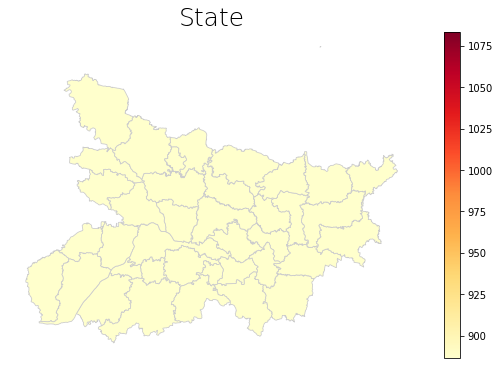

In [28]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('State', fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot the figure
merged.plot(column=crime, cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

For India map

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
def clean(data01to14):
	district=[]
	for i in data01to14['DISTRICT']:
	    if ' ' in i:
	        temp=i.find(' ')
	        if i.count(' ')==1:
	            district.append(i[0]+i[1:temp+1].lower()+i[temp+1]+i[temp+2:].lower())
	        else:
	            temp2=i.rfind(' ')
	            district.append(i[0]+i[1:temp+1].lower()+i[temp+1]+i[temp+2:temp2].lower()+i[temp2+1]+i[temp2+2:].lower())
	    else:
	        district.append(i[0]+i[1:].lower())
	return district
def murder(data01to14):
	murder=pd.DataFrame({'DISTRICT':district,'MURDER':data01to14['MURDER']})
	finalmurder=dict()
	for i in district:
	    finalmurder[i]=sum(murder[murder['DISTRICT']==i]['MURDER'])
	return finalmurder

def theft(data01to14):
	theft=pd.DataFrame({'district':district,'theft':data01to14['THEFT'],'robbery':data01to14['ROBBERY'],'burglary':data01to14['BURGLARY']})
	finaltheft=dict()
	for i in district:
	    useme=theft[theft['district']==i]
	    finaltheft[i]=sum(useme['theft'])+sum(useme['robbery'])+sum(useme['burglary'])
	return finaltheft

def women(data01to14):
	women=pd.DataFrame({'district':district,'kidnap':data01to14['KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS'],'rape':data01to14['RAPE'],'assault':data01to14['ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY'],'insult':data01to14['INSULT TO MODESTY OF WOMEN'],'husband':data01to14['CRUELTY BY HUSBAND OR HIS RELATIVES'],'dowry':data01to14['DOWRY DEATHS']})
	finalwomen=dict()
	for i in district:
	    useme=women[women['district']==i]
	    finalwomen[i]=sum(useme['rape'])+sum(useme['kidnap'])+sum(useme['assault'])+sum(useme['insult'])+sum(useme['husband'])+sum(useme['dowry'])
	return finalwomen

def merge_murder(finalmurder,map_df):
	murder=pd.DataFrame({'DISTRICT':finalmurder.keys(),'MURDER':finalmurder.values()})
	mergedmurder = map_df.set_index('NAME_2').join(murder.set_index('DISTRICT'))
	mergedmurder['MURDER'].fillna(mergedmurder['MURDER'].mean(), inplace=True)
	return mergedmurder

def merge_theft(finaltheft,map_df):
	theft=pd.DataFrame({'district':finaltheft.keys(),'theft':finaltheft.values()})
	mergedtheft=map_df.set_index('NAME_2').join(theft.set_index('district'))
	mergedtheft['theft'].fillna(mergedtheft['theft'].mean(), inplace=True)
	return mergedtheft

def merge_women(finalwomen,map_df):
	women=pd.DataFrame({'district':finaltheft.keys(),'women':finalwomen.values()})
	mergedwomen=map_df.set_index('NAME_2').join(women.set_index('district'))
	mergedwomen['women'].fillna(mergedwomen['women'].mean(), inplace=True)
	return mergedwomen

fp = "gadm36_IND_shp/gadm36_IND_2.shp" 
map_df=gpd.read_file(fp)
map_df = map_df[['NAME_2', 'geometry']]
data01to14=pd.read_csv('data/01_District_wise_crimes_committed_IPC_2001_2012.csv')
district=clean(data01to14)

Enter crime:  theft


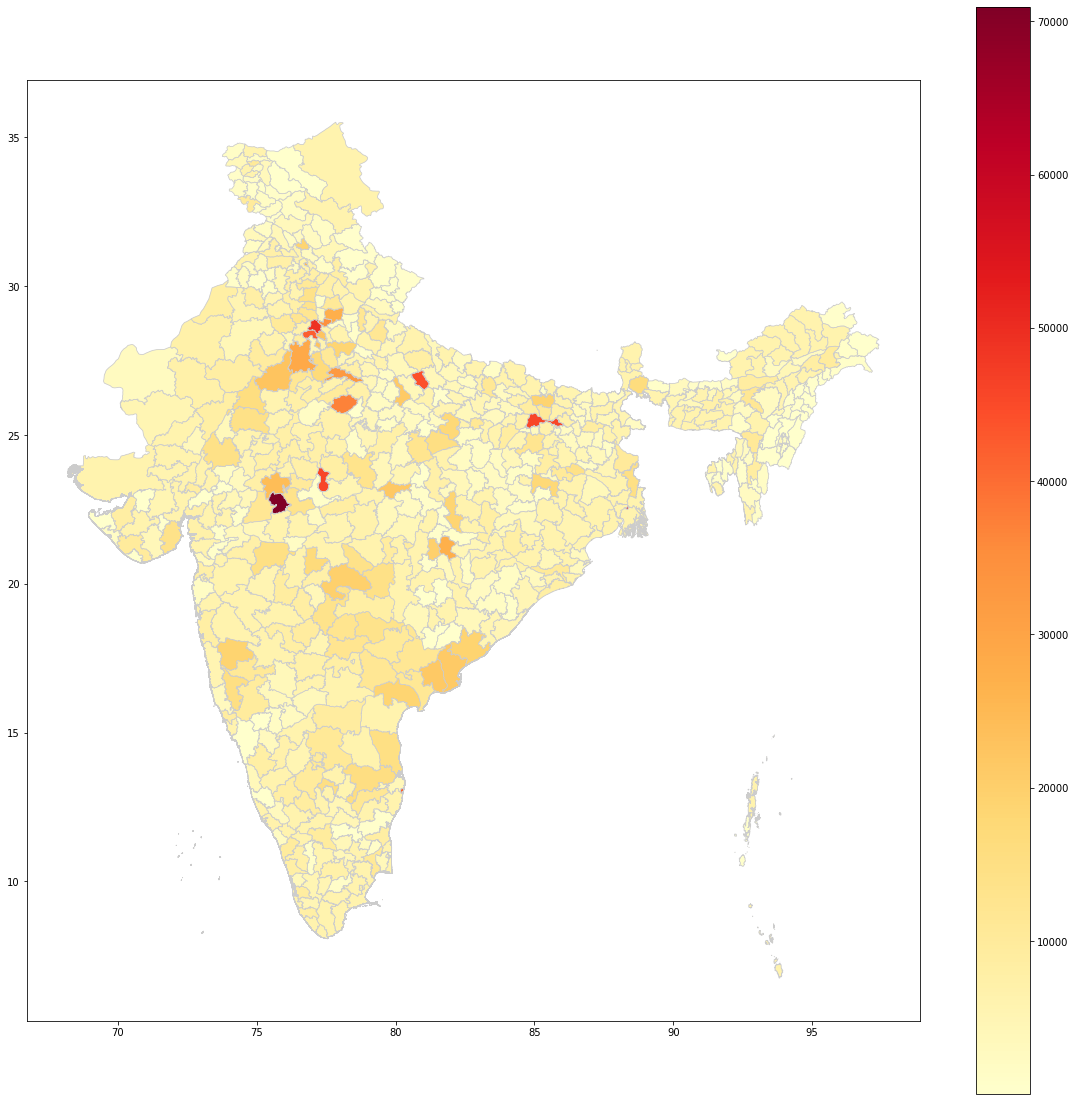

In [3]:
crime=input("Enter crime: ")
if crime=="murder":
	finalmurder=murder(data01to14)
	mergedmurder=merge_murder(finalmurder,map_df)
	fig, ax = plt.subplots(1, figsize=(20,20))
	mergedmurder.plot(column='MURDER', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
elif crime=="theft":
	finaltheft=theft(data01to14)
	mergedtheft=merge_theft(finaltheft,map_df)
	fig, ax = plt.subplots(1, figsize=(20,20))
	mergedtheft.plot(column='theft', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
elif crime=="women":
	finalwomen=women(data01to14)
	mergedwomen=merge_women(finalwomen,map_df)
	fig, ax = plt.subplots(1, figsize=(20,20))
	mergedwomen.plot(column='women', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)


Enter District:  Bihar
Enter Crime:  MURDER


<AxesSubplot:title={'center':'State'}>

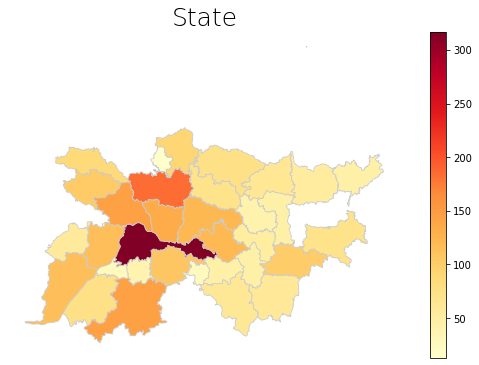

In [19]:
fp = "gadm36_IND_shp/gadm36_IND_2.shp"
map_df = gpd.read_file(fp)
district=input("Enter District: ")
crime=input("Enter Crime: ")
map_df = map_df[['NAME_1', 'NAME_2', 'geometry']]
map_df = map_df[map_df['NAME_1']==district]
district_wise = data01to14[['STATE/UT', 'DISTRICT', crime]]
district_wise = district_wise[district_wise['STATE/UT']==district]
merged = map_df.set_index('NAME_2').join(district_wise.set_index('DISTRICT'))
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('State', fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot the figure
merged.plot(column=crime, cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

In [1]:
fig.savefig("District_wise.png", dpi=100)


NameError: name 'fig' is not defined

In [25]:
data01to14.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,ARSON,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE
0,ANDHRA PRADESH,Adilabad,2001,101,60,17,50,0,50,46,...,177,78,16,104,30,16,149,34,175,181
1,ANDHRA PRADESH,Anantapur,2001,151,125,1,23,0,23,53,...,309,168,11,65,69,7,118,24,154,270
2,ANDHRA PRADESH,Chittoor,2001,101,57,2,27,0,27,59,...,559,156,33,209,38,14,112,83,186,404
3,ANDHRA PRADESH,Cuddapah,2001,80,53,1,20,0,20,25,...,137,164,12,37,23,17,126,38,57,233
4,ANDHRA PRADESH,East Godavari,2001,82,67,1,23,0,23,49,...,871,70,50,220,41,12,109,58,247,431


In [31]:
def year_wise_women(district):
    district_crime = data01to14[data01to14['DISTRICT'] == district]
    district_crime.set_index('YEAR')[['DOWRY DEATHS','RAPE','KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS', 'CRUELTY BY HUSBAND OR HIS RELATIVES','INSULT TO MODESTY OF WOMEN','ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY']].plot(kind = 'line', figsize = (12,8))
    plt.xlabel('Years')
    plt.ylabel('No. of Cases in '+district)
    plt.title('Domestic Violence against Women')
    return plt

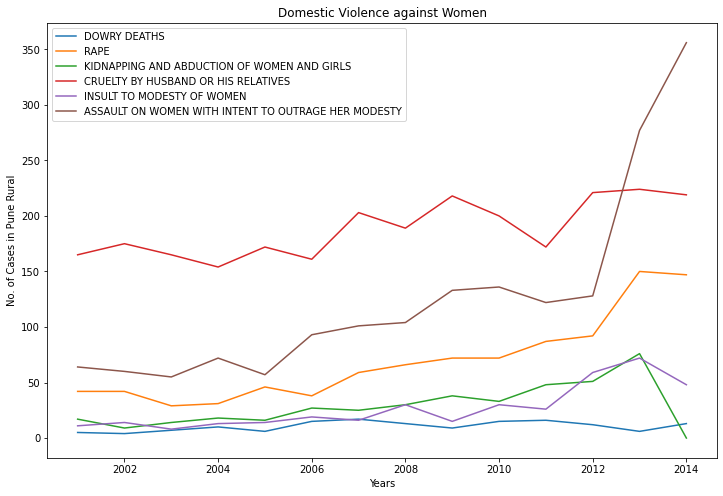

In [37]:
year_wise('Pune Rural').show()

In [34]:
def year_wise_murder(district):
    district_crime = data01to14[data01to14['DISTRICT'] == district]
    district_crime.set_index('YEAR')[['MURDER','ATTEMPT TO MURDER']].plot(kind = 'line', figsize = (12,8))
    plt.xlabel('Years')
    plt.ylabel('No. of Cases in '+district)
    plt.title('Murders')
    return plt

<module 'matplotlib.pyplot' from '/home/frank/Documents/env01/lib64/python3.8/site-packages/matplotlib/pyplot.py'>

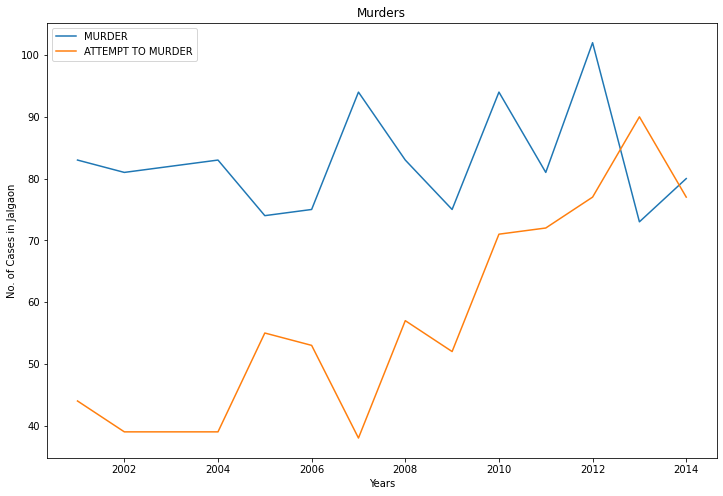

In [35]:
year_wise_murder('Jalgaon')

In [7]:
dataChildren=pd.read_csv('data/03_District_wise_crimes_committed_against_children_2001_2012.csv')
dataChildren.head()

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,Total
0,ANDHRA PRADESH,ADILABAD,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,ANDHRA PRADESH,ANANTAPUR,2001,19.0,12.0,29.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,66
2,ANDHRA PRADESH,CHITTOOR,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [8]:
fp = "gadm36_IND_shp/gadm36_IND_2.shp"
map_df = gpd.read_file(fp)
map_df = map_df[['NAME_2', 'geometry']]

In [16]:
def plot_map(crime):
    final=dict()
    for i in data01to14['DISTRICT'].unique():
        final[i]=sum(data01to14[crime][data01to14['DISTRICT']==i])
    
    district_wise=pd.DataFrame({'district':final.keys(),crime:final.values()})
    merged=map_df.set_index('NAME_2').join(district_wise.set_index('district'))
    merged.fillna(merged[crime].mean(),inplace=True)
    fig, ax = plt.subplots(1, figsize=(20,20))
    ax.axis('off')
    ax.set_title(crime, fontdict={'fontsize': '25', 'fontweight' : '3'})
    merged.plot(column=crime, cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

In [14]:
data01to14['MURDER'][data01to14['DISTRICT']=='Pune']

384      119
1101     141
1830     127
2558     132
3292     123
4026     124
4768     130
5518     146
6283     125
7058     141
7843     148
8644     163
9459     132
10279    153
Name: MURDER, dtype: int64

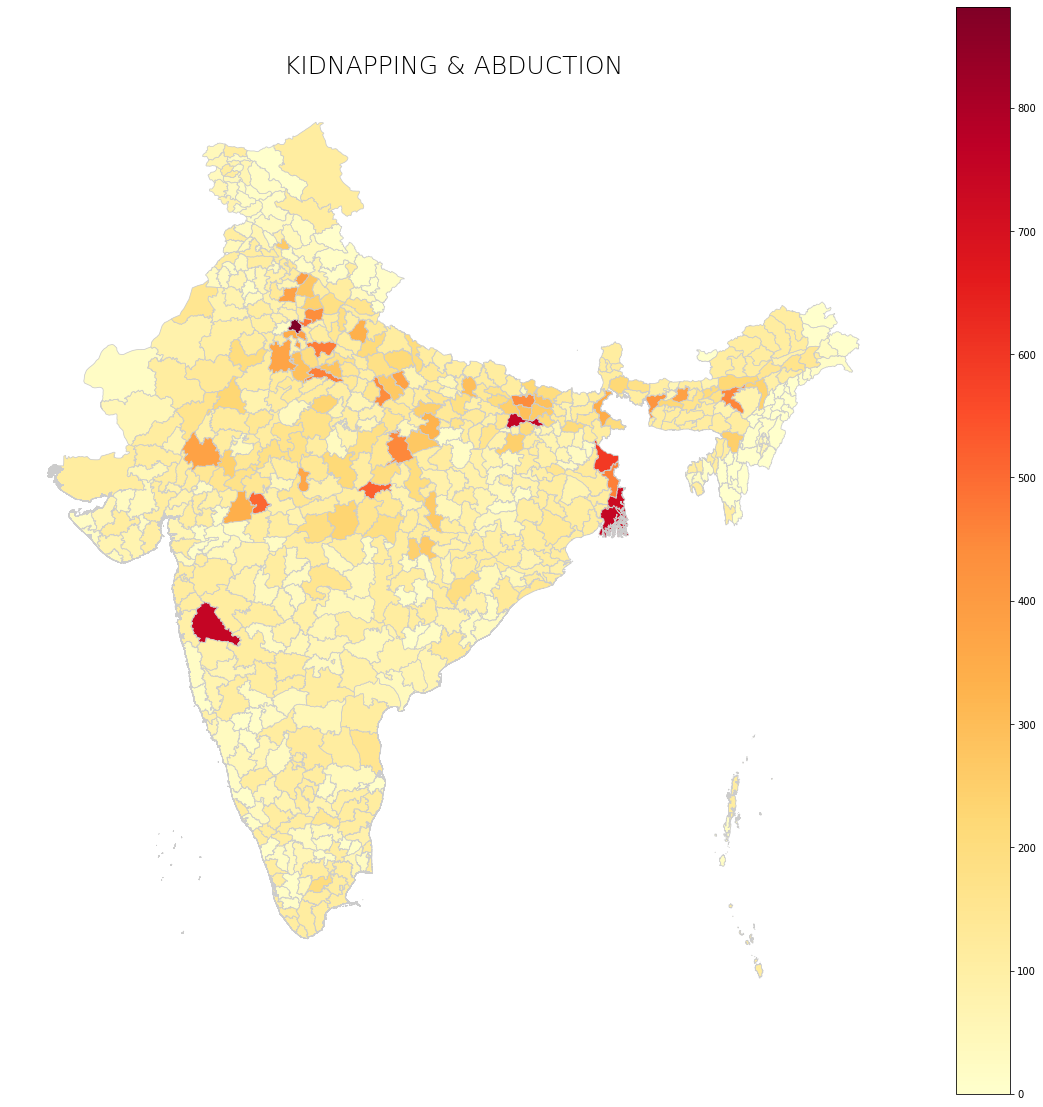

In [17]:
plot_map('KIDNAPPING & ABDUCTION')

In [31]:
def plot_map_crime(district,crime,data):
    district_wise = data[data['DISTRICT'] == district]
    district_wise.set_index('YEAR')[crime].plot(kind = 'line', figsize = (12,8))
    plt.xlabel('Years')
    plt.ylabel('No. of Cases in '+district)
    plt.title(crime)

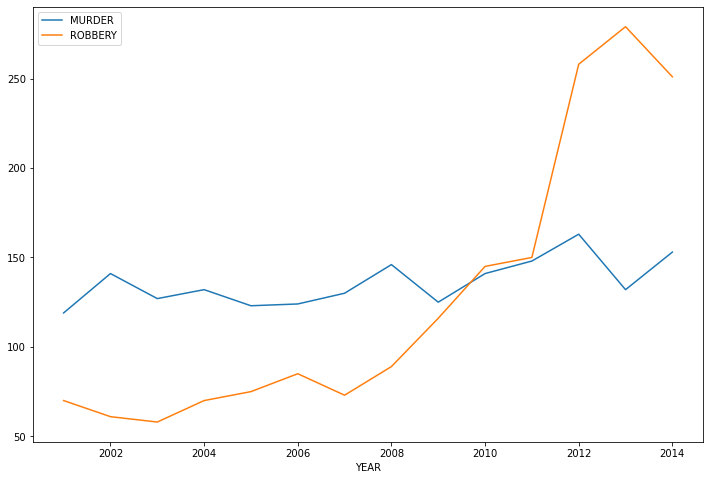

In [30]:
plot_map_crime('Pune',['MURDER','ROBBERY'],data01to14)

In [58]:
def multi_crime_plot(district,crime,data=data01to14):
    district_wise = data[data['DISTRICT'] == district]
    gr_plt=district_wise.set_index('YEAR')[crime].plot(kind = 'line', figsize = (12,8))
    plt.xlabel('Years')
    plt.ylabel('No. of Cases in '+district)
    plt.title(crime)
    fig = gr_plt.get_figure()
    fig.savefig("plot.png")

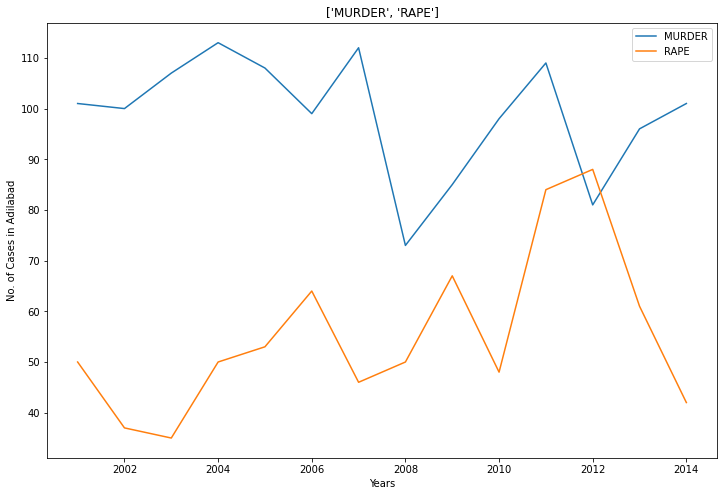

In [60]:
multi_crime_plot('Adilabad',['MURDER','RAPE'])

array(['Adilabad', 'Anantapur', 'Chittoor', 'Cuddapah', 'East Godavari',
       'Guntakal', 'Guntur', 'Hyderabad City', 'Karimnagar', 'Khammam',
       'Krishna', 'Kurnool', 'Mahaboobnagar', 'Medak', 'Nalgonda',
       'Nellore', 'Nizamabad', 'Prakasham', 'Ranga Reddy', 'Secunderabad',
       'Srikakulam', 'Vijayawada', 'VIJAYAWADA ', 'Visakha Rural',
       'Visakhapatnam', 'Vizianagaram', 'Warangal', 'West Godavari',
       'Total', 'Changlang', 'Dibang Valley', 'Kameng East',
       'Kameng West', 'Lohit', 'Papum Pare', 'Siang East', 'Siang Upper',
       'Siang West', 'Subansiri Lower', 'Subansiri Upper', 'Tawang',
       'Tirap', 'Barpeta', 'Bongaigaon', 'C.i.d.', 'Cachar', 'Darrang',
       'Dhemaji', 'Dhubri', 'Dibrugarh', 'G.r.p.', 'Goalpara', 'Golaghat',
       'Guwahati City', 'Hailakandi', 'Jorhat', 'Kamrup', 'Karbi Anglong',
       'Karimganj', 'Kokrajhar', 'Lakhimpur', 'Morigaon', 'N.c.hills',
       'Nagaon', 'Nalbari', 'R.p.o.', 'Sibsagar', 'Sonitpur', 'Tinsukia',
      